In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc

In [16]:
df = pd.read_csv('./datasets/master_pima-indians-diabetes.csv')
df

,Pregnancies,GLucose,BloodPressure,Skin Thickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [17]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [18]:
df.isna().sum()

Pregnancies                 0
GLucose                     0
BloodPressure               0
Skin Thickness              0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [19]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [20]:
X.head()

,Pregnancies,GLucose,BloodPressure,Skin Thickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [21]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [23]:
X_train.head()

,Pregnancies,GLucose,BloodPressure,Skin Thickness,Insulin,BMI,DiabetesPedigreeFunction,Age
434,1,90,68,8,0,24.5,1.138,36
4,0,137,40,35,168,43.1,2.288,33
399,3,193,70,31,0,34.9,0.241,25
726,1,116,78,29,180,36.1,0.496,25
274,13,106,70,0,0,34.2,0.251,52


In [24]:
std = StandardScaler()
X_std_train = std.fit_transform(X_train)
X_std_test = std.transform(X_test)

In [31]:
X_std_train_df = pd.DataFrame(X_std_train, columns=X.columns)
X_std_test_df = pd.DataFrame(X_std_test, columns=X.columns)

In [32]:
X_std_train_df

,Pregnancies,GLucose,BloodPressure,Skin Thickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.840589,-0.977981,-0.067387,-0.787159,-0.694123,-0.962796,1.999324,0.228981
1,-1.139790,0.504531,-1.515530,0.931693,0.784883,1.396149,5.420148,-0.024647
2,-0.242187,2.270928,0.036052,0.677048,-0.694123,0.356184,-0.668919,-0.700987
3,-0.840589,-0.157868,0.449807,0.549726,0.890526,0.508374,0.089612,-0.700987
4,2.749823,-0.473296,0.036052,-1.296448,-0.694123,0.267407,-0.639172,1.581662
...,...,...,...,...,...,...,...,...
609,-0.541388,0.189103,-1.205214,0.040436,2.255085,0.292772,-0.862270,-0.954615
610,1.553019,0.062932,0.036052,1.504643,0.133416,0.127899,-0.273293,0.567151
611,-1.139790,1.450815,-3.584306,-1.296448,-0.694123,0.026439,1.109910,-0.278274
612,0.356215,0.472988,0.656685,-1.296448,-0.694123,-4.070008,0.517959,3.018886


In [34]:
# Models
rf = RandomForestClassifier()
svm = SVC()
nb = GaussianNB()

In [37]:
# Fit the Models
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)
nb.fit(X_train, y_train)

GaussianNB()

In [39]:
y_rf = rf.predict(X_test)
y_svm = svm.predict(X_test)
y_nb = nb.predict(X_test)

In [44]:
print("Accuracy of Random Forest:", accuracy_score(y_test, y_rf))
print("Accuracy of SVM:", accuracy_score(y_test, y_svm))
print("Accuracy of Naive Bayes:", accuracy_score(y_test, y_nb))

Accuracy of Random Forest: 0.7727272727272727
Accuracy of SVM: 0.7337662337662337
Accuracy of Naive Bayes: 0.7337662337662337


In [58]:
def evaluate_model(y_test, y_pred):
    print("Accuracy", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Accuracy:", recall_score(y_test, y_pred))
    print("Accuracy:", f1_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print()
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)


Random Forest:
Accuracy 0.7727272727272727
Precision: 0.6938775510204082
Accuracy: 0.6296296296296297
Accuracy: 0.6601941747572816
Confusion Matrix:
 [[85 15]
 [20 34]]



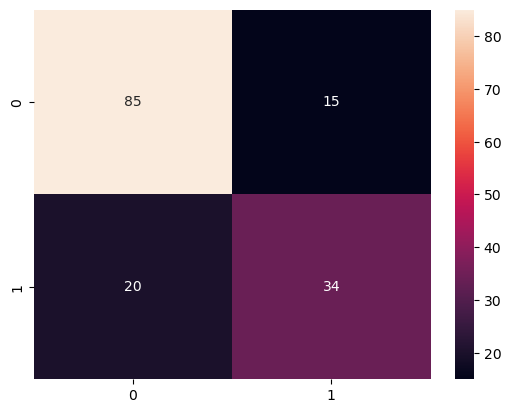

In [60]:
print("\nRandom Forest:")
evaluate_model(y_test, y_rf)


SVM:
Accuracy 0.7337662337662337
Precision: 0.7096774193548387
Accuracy: 0.4074074074074074
Accuracy: 0.5176470588235295
Confusion Matrix:
 [[91  9]
 [32 22]]



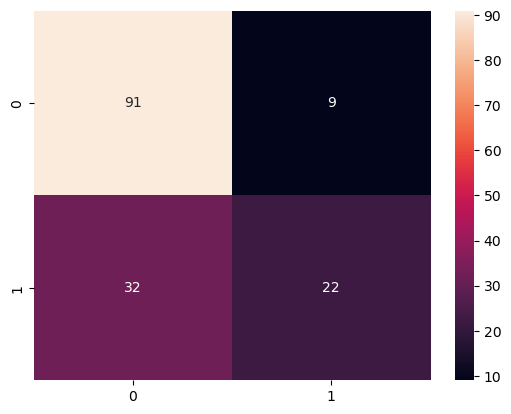

In [61]:
print("\nSVM:")
evaluate_model(y_test, y_svm)


Naive Bayes:
Accuracy 0.7337662337662337
Precision: 0.6382978723404256
Accuracy: 0.5555555555555556
Accuracy: 0.594059405940594
Confusion Matrix:
 [[83 17]
 [24 30]]



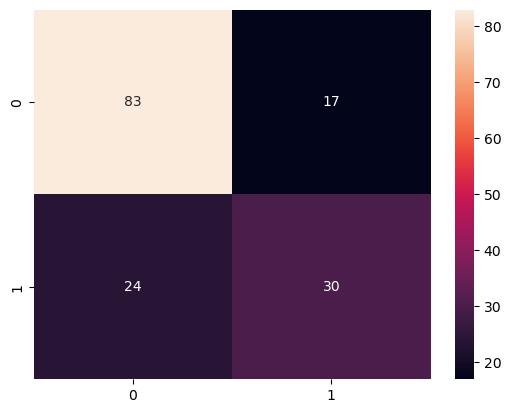

In [62]:
print("\nNaive Bayes:")
evaluate_model(y_test, y_nb)

In [64]:
model_params = {
    "rf": {
        "model": RandomForestClassifier(),
        "params": {
            "C": [1, 5, 10]
        }
    },
    "svm": {
        "model": SVC(),
        "params": {
            "C": [1, 5, 10]
        }
    },
    "nb": {
        "model": GaussianNB(),
        "params": {
            "C": [1, 5, 10]
        }
    }
}

In [93]:
for m, mp in model_params.values():
    grid_search = GridSearchCV(m, mp, scoring='accuracy', cv=3)
    grid_search.fit(X_std_train, y_train)

InvalidParameterError: The 'estimator' parameter of GridSearchCV must be an object implementing 'fit'. Got 'model' instead.

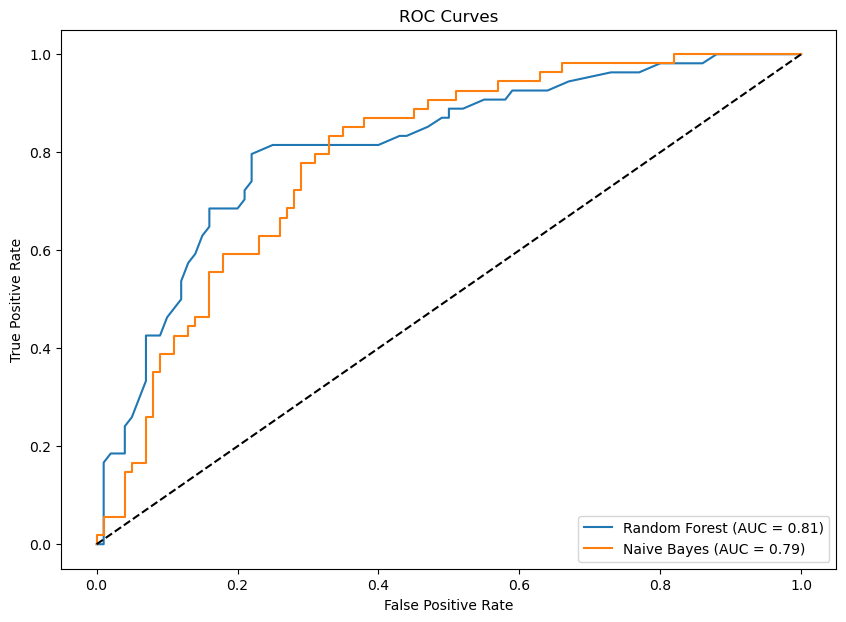

In [90]:
# ROC Curve
plt.figure(figsize=(10, 7))

for clf, name in zip([rf, svm, nb], ['Random Forest', 'Support Vector Machine', 'Naive Bayes']):
    if hasattr(clf, "predict_proba"):
        y_prob = clf.predict_proba(X_test)[:, 1] if y_test.nunique() == 2 else clf.predict_proba(X_test).max(axis=1)
        fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=y_test.max())
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

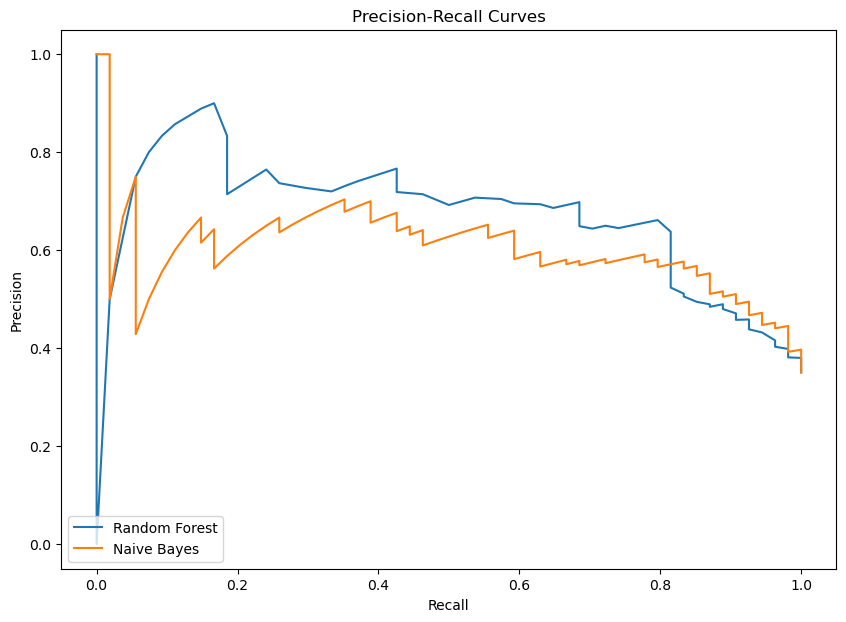

In [91]:
# Precision-Recall Curve
plt.figure(figsize=(10, 7))

for clf, name in zip([rf, svm, nb], ['Random Forest', 'Support Vector Machine', 'Naive Bayes']):
    if hasattr(clf, "predict_proba"):
        y_prob = clf.predict_proba(X_test)[:, 1] if y_test.nunique() == 2 else clf.predict_proba(X_test).max(axis=1)
        precision, recall, _ = precision_recall_curve(y_test, y_prob, pos_label=y_test.max())
        plt.plot(recall, precision, label=f'{name}')

plt.title('Precision-Recall Curves')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.show()